In [ ]:
!gdown 1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h

Downloading...
From: https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
To: /content/title_brand.csv
100% 97.3M/97.3M [00:01<00:00, 56.3MB/s]


In [ ]:
!gdown 1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW

Downloading...
From (original): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
From (redirected): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW&confirm=t&uuid=1685a70c-2e11-4bab-b017-1086e07abdea
To: /content/train_data.csv
100% 635M/635M [00:09<00:00, 66.3MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("train_data.csv")
brand_data = pd.read_csv("title_brand.csv")

<ipython-input-6-92eb703787f6>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("train_data.csv")


In [ ]:
train_data.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


1)

In [ ]:
train_data.overall.head()

,overall
0,2
1,5
2,4
3,5
4,5


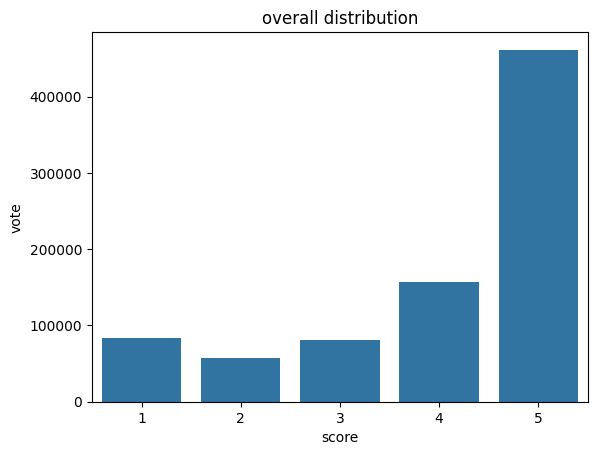

In [ ]:
sns.countplot(x='overall', data=train_data)
plt.title('overall distribution')
plt.xlabel('score')
plt.ylabel('vote')
plt.show()


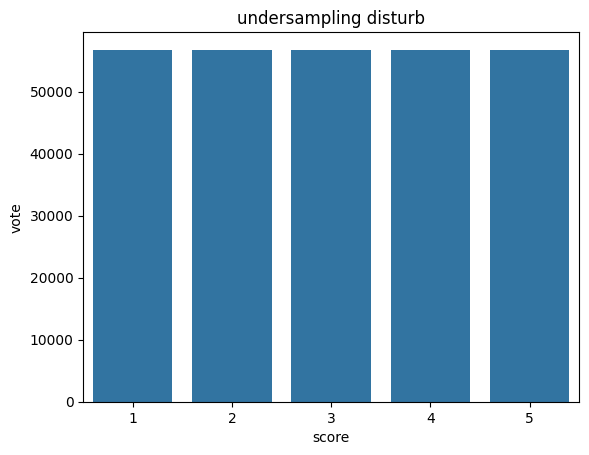

In [ ]:
#use undersampling
from imblearn.under_sampling import RandomUnderSampler
X = train_data.drop(columns='overall')
y = train_data['overall']
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

sns.countplot(x=y_resampled)
plt.title('undersampling disturb')
plt.xlabel('score')
plt.ylabel('vote')
plt.show()


2)

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer


In [ ]:
import nltk
nltk.download('wordnet')

nltk.download('punkt')
nltk.download('punkt_tab')

nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword_list = nltk.corpus.stopwords.words('english')
print(stopword_list)
#  tokenize text
def tokenize_text(text):
  tokens = nltk.word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  return tokens

# remove stop words
def remove_stopwords(text):
  tokens = tokenize_text(text)
  filtered_tokens = [token for token in tokens if token not in
                         stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
remove_stopwords(train_data['reviewText'][0])

"I older URC-WR7 remote thought would upgrade ( TWC stuck ) , one fails one n't . The old remote could go head head learn . I 2 different Blu Ray players ( LG & Panasonic ) one fails . It learn buttons . The biggest problem streaming I need hit blue , red , yellow , green buttons . These work either , I pull remote one setting . I n't know give multiple code methods learning ."

In [ ]:
train_data['cleaned_reviewText'] = train_data['reviewText'].apply(remove_stopwords)


KeyboardInterrupt: 

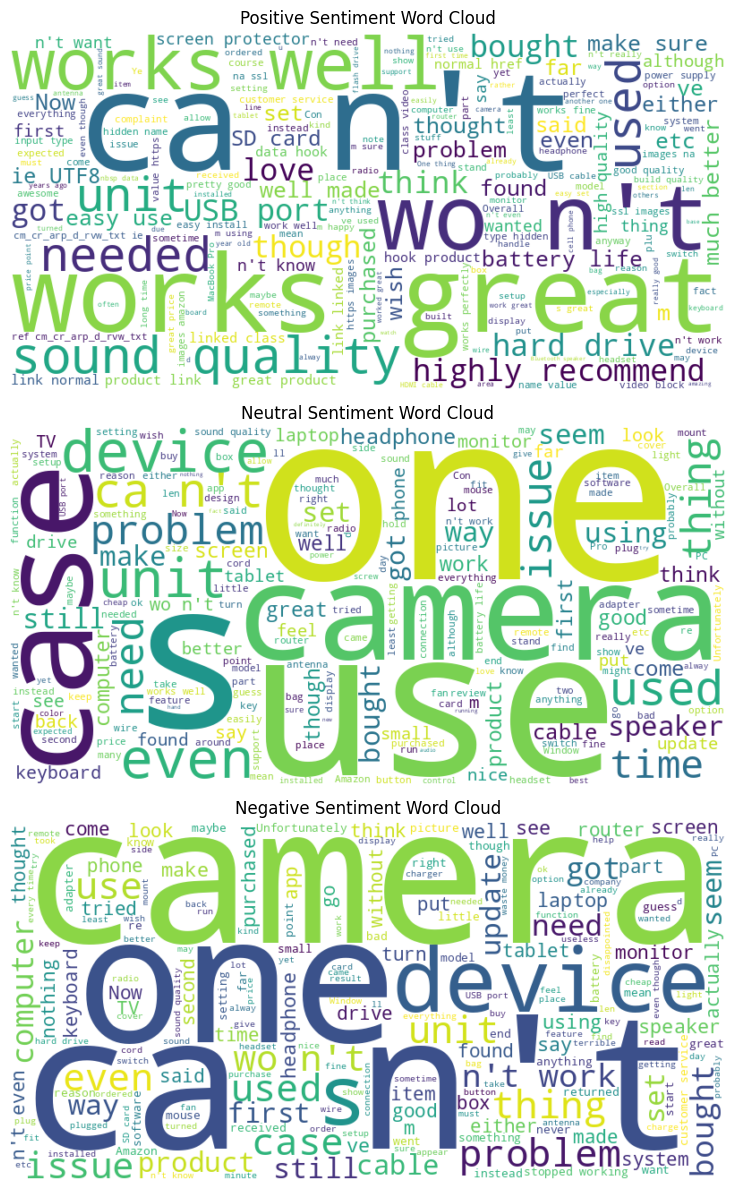

Common words between positive and negative reviews: {'slow-mode', 'Requirements', 'doubtful', 'yurbud', 'Boompro', '10ma', 'favorites', 'trucker', 'cents', 'AO', 'Surprising', '19v', 'theorist', '_really_', '400GB', 'Aoki', 'oscilloscopes', 'DBRAND', 'DOUBLE', 'ZNARI', 'underdog', 'ADV', 'last-resort', 'villa', 'overstated', "'permanent", 'interlock', 'micro-screwdriver', 'eally', 're-tightened', 'favoring', 'representative', 'Acoustat', 'theses', '10year', 'IXP-11-14', 'bulking', 'Vault', 'G-sync', 'competetion', 'Minimalism', '1/4', 'pc-', 'muliple', 'garage/workshop', '4.42', 'U3', 'XD', 'Acadia', 'moisten', '95db', 'Garry', 'non-wifi', '20lbs', 'truble', 'hyper-x', 'limp', 'YES', 'bbqs', 'mapping', '11:30pm', 'non-dslr', 'Powerbooks', 'Wireless-AC1900', 'withot', 'cross-shaped', 'multi-disciplinary', 'trimmings', 'tenting', 'O.k', 'DEVICES', 'smart-tv', 'shake-free', 'intention', 'webb', 'headphones', 'bprz', '33ft', 'super-strong', 'walking/working', 'leaned', '1300.00', 'one-minu

In [ ]:

from wordcloud import WordCloud
# Separate the data into positive, neutral, and negative sentiment categories
positive_reviews = train_data[train_data['overall'] >= 4]['cleaned_reviewText']
neutral_reviews = train_data[train_data['overall'] == 3]['cleaned_reviewText']
negative_reviews = train_data[train_data['overall'] <= 2]['cleaned_reviewText']

# Combine reviews for each sentiment category into a single text string
positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

# Generate Word Clouds for each sentiment category
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
neutral_wc = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the Word Clouds
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(neutral_wc, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

# Now check for common words between positive and negative reviews
positive_words = set(positive_text.split())
negative_words = set(negative_text.split())

common_words = positive_words.intersection(negative_words)
print(f"Common words between positive and negative reviews: {common_words}")

In [ ]:
text = """
کلمات مشترکی که بین دسته‌های مثبت و منفی یافت شده‌اند، به‌نظر می‌رسد بیشتر شامل نام‌ها، مدل‌ها، اصطلاحات تخصصی یا عبارات خاصی باشند که احتمالاً به محصولات، ویژگی‌ها یا تجربه‌های فنی مربوط هستند. این اشتراکات می‌تواند به چند دلیل باشد:
- کاربران ممکن است درباره یک محصول یا ویژگی یکسان نظرات مثبت و منفی داشته باشند؛ مثلاً برخی از "headphones" رضایت دارند، در حالی که دیگران به دلیل مشکلاتی مانند "jerkiness" یا "hiss/hum" ناراضی هستند.
- همچنین، برخی کلمات بسته به کاربرد و انتظارات کاربران، حس مثبت یا منفی پیدا می‌کنند؛ برای مثال "gaming" برای گیمرهای حرفه‌ای مثبت است اما برای کاربران عادی به‌دلیل پیچیدگی ممکن است منفی به‌نظر برسد.
- بسیاری از این کلمات به برندها یا اصطلاحات فنی مانند "G-sync"، "Vmoda" یا "BIOS" اشاره دارند که ذاتاً مثبت یا منفی نیستند اما بسته به تجربه کاربر، حس متفاوتی را القا می‌کنند.
- کلماتی مانند "old"، "Clear" یا "Different" نیز به‌دلیل وابستگی به بافت جمله، ممکن است به‌عنوان ویژگی مثبت (مثلاً نوستالژی یا شفافیت) یا منفی (مانند کهنگی یا تفاوت ناخواسته) تعبیر شوند.

برای تفسیر دقیق‌تر، پیشنهاد می‌شود از روش‌های زیر استفاده شود:
1. تحلیل زمینه (Context Analysis): بررسی جملاتی که این کلمات در آن‌ها به‌کار رفته‌اند، می‌تواند درک بهتری از احساس کاربران نسبت به آن‌ها بدهد.
2. واکاوی وابستگی‌های کلمه (Word Dependency Analysis): بررسی کلمات مجاور این عبارات ممکن است به فهم بهتر حس منفی یا مثبت کمک کند.
3. تحلیل معنایی (Sentiment Analysis): استفاده از مدل‌های تحلیل احساسات برای بررسی جهت‌گیری هر کلمه در متن می‌تواند نتایج دقیق‌تری به‌دست دهد.
"""



3)

In [ ]:
train_data['reviewerID']

,reviewerID
0,A2OSUEZJIN7BI
1,A2NETQRG6JHIG7
2,A12JHGROAX49G7
3,A1KV65E2TMMG6F
4,A280POPEWI0NSA
...,...
838939,A1OOVLE2KZ6KGA
838940,A77K1B31UAQ29
838941,A2SVXUVUAWUDK2
838942,A2HUZO7MQAY5I2


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [ ]:
train_data['vote'] = pd.to_numeric(train_data['vote'], errors='coerce')

filtered_data = train_data.dropna(subset=['vote'])

reviewer_total_votes = filtered_data.groupby('reviewerID')['vote'].sum()

top_10_reviewers = reviewer_total_votes.sort_values(ascending=False).head(10)

top_10_data = train_data[train_data['reviewerID'].isin(top_10_reviewers.index)]

for reviewer_id, total_votes in top_10_reviewers.items():
    reviewer_name = top_10_data[top_10_data['reviewerID'] == reviewer_id]['reviewerName'].values[0]
    print(f"Reviewer Name: {reviewer_name}, Reviewer ID: {reviewer_id}, Total Votes: {total_votes}")

Reviewer Name: Benson Leung, Reviewer ID: A25GROL6KJV3QG, Total Votes: 4572.0
Reviewer Name: Obi Wan, Reviewer ID: A2IK776FY6MEMG, Total Votes: 1608.0
Reviewer Name: Chris Winter, Reviewer ID: A1A39899KH5QCI, Total Votes: 1352.0
Reviewer Name: Mayra S., Reviewer ID: AMYCUX8EWEUVV, Total Votes: 1342.0
Reviewer Name: VermontGuy, Reviewer ID: A9K7V1MKJ9BOJ, Total Votes: 1337.0
Reviewer Name: Michael, Reviewer ID: A1UQUDT2Q0YENM, Total Votes: 1230.0
Reviewer Name: PhotoGraphics, Reviewer ID: A3R1WFO4KIUQXZ, Total Votes: 1209.0
Reviewer Name: Nicholas, Reviewer ID: A2Z9APP5B09MFY, Total Votes: 1188.0
Reviewer Name: NLee the Engineer, Reviewer ID: AOEAD7DPLZE53, Total Votes: 1103.0
Reviewer Name: David H, Reviewer ID: AZPCDY9OQ605E, Total Votes: 1045.0


4)

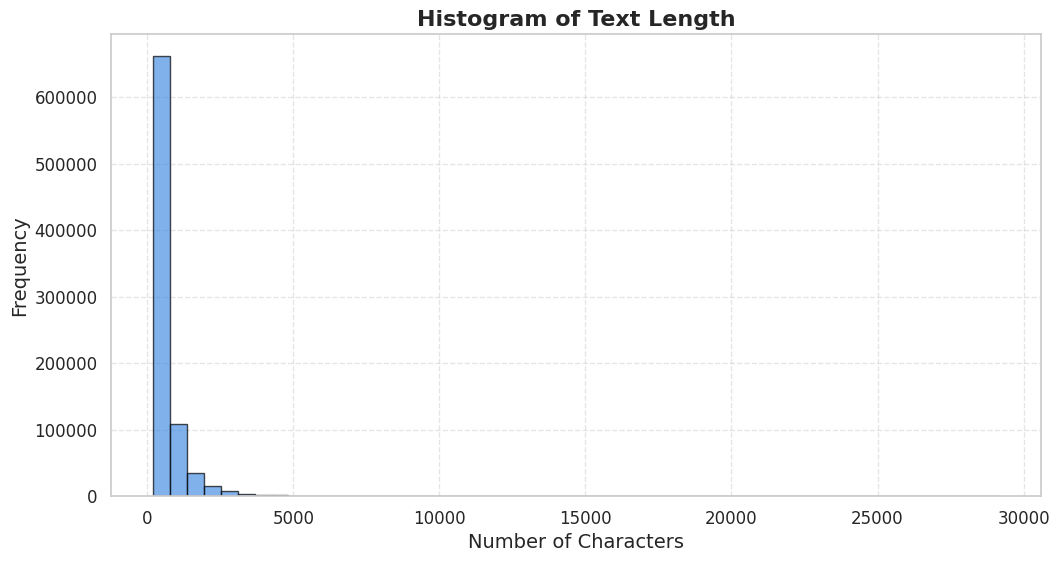

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train_data['review_length'] = train_data['reviewText'].apply(lambda x: len(str(x)))

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
plt.hist(train_data['review_length'], bins=50, color='#4A90E2', edgecolor='black', alpha=0.7)
plt.title('Histogram of Text Length', fontsize=16, fontweight='bold')
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


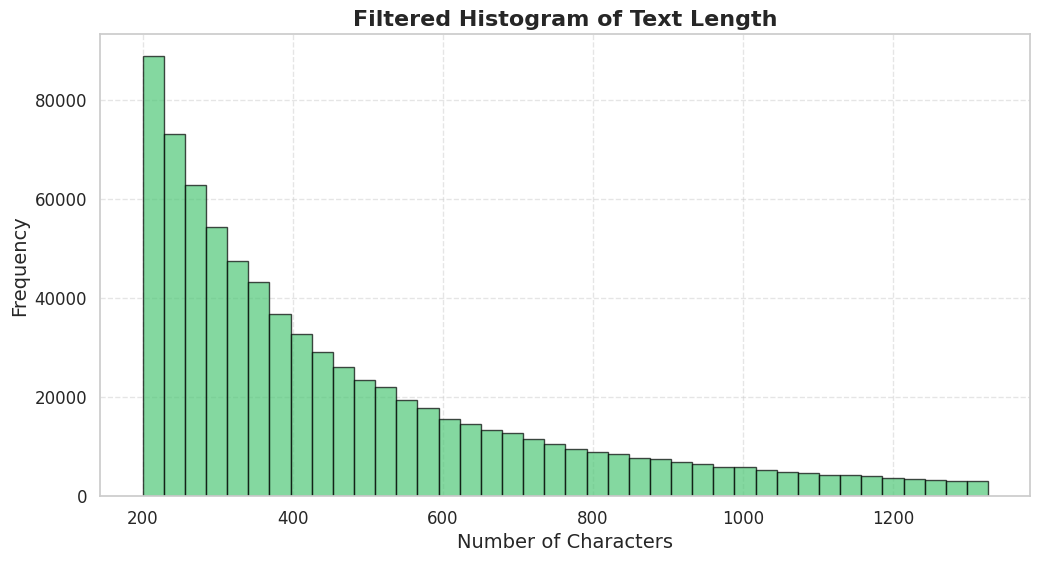

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = train_data['review_length'].quantile(0.25)
Q3 = train_data['review_length'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = train_data[(train_data['review_length'] >= Q1 - 1.5 * IQR) &
                          (train_data['review_length'] <= Q3 + 1.5 * IQR)]

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
plt.hist(filtered_data['review_length'], bins=40, color='#50C878', edgecolor='black', alpha=0.7)
plt.title('Filtered Histogram of Text Length', fontsize=16, fontweight='bold')
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
filtered_reviews = train_data[(train_data['review_length'] >= 10) &
                             (train_data['review_length'] <= 1000)]

print(f"number of sample after limitations: {len(filtered_reviews)}")

number of sample after limitations: 720234


5)

In [ ]:
train_data.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [ ]:
brand_data.head()

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page


In [ ]:
train_data['asin']

,asin
0,0511189877
1,0511189877
2,0511189877
3,0511189877
4,0594459451
...,...
838939,B01HJCN1EI
838940,B01HJCN1EI
838941,B01HJH42KU
838942,B01HJH40WU


In [ ]:
merge_data = pd.merge(train_data, brand_data, on='asin',how='inner')
filter_five = merge_data[merge_data['overall']==5]
top_ten = filter_five.groupby(['brand' , 'title']).size().reset_index(name='count').sort_values(by='count' , ascending=False).head(10)
top_ten

,brand,title,count
10992,Cambridge Soundworks,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,1163
39460,NETGEAR,NETGEAR N300 WiFi Range Extender (EX2700),659
49185,Roku,Roku Streaming Stick (3600R) - HD Streaming Pl...,600
56451,StarTech,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,598
34377,Logitech,Logitech M570 Wireless Trackball Mouse &ndash;...,552
51240,Samsung,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...,529
39416,NETGEAR,NETGEAR 5-Port Gigabit Ethernet Unmanaged Swit...,482
5073,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,471
63425,VideoSecu,VideoSecu ML531BE TV Wall Mount for Most 27&qu...,448
12377,Cheetah,Cheetah Mounts APFMSB TV Wall Mount Bracket fo...,434


6)

In [ ]:
brand_review_counts = merge_data['brand'].value_counts().reset_index()
brand_review_counts.columns = ['brand', 'review_count']

top_10_brands = brand_review_counts.head(10)['brand']

top_brands_df = merge_data[merge_data['brand'].isin(top_10_brands)]

brand_avg_rating = top_brands_df.groupby('brand')['overall'].mean().reset_index()
brand_avg_rating.columns = ['brand', 'average_rating']

brand_avg_rating = brand_avg_rating.sort_values(by='average_rating', ascending=False)


brand_avg_rating

,brand,average_rating
1,Anker,4.244320
0,AmazonBasics,4.201468
5,Sabrent,4.028005
7,SanDisk,3.958810
3,Logitech,3.954061
6,Samsung,3.941268
8,Sony,3.938726
9,TP-LINK,3.928681
2,Asus,3.855550
4,NETGEAR,3.836274
